#### Transferencia factorizada del Filtro pasa banda Butterworth de tercer orden

<IPython.core.display.Math object>

#### Transferencia factorizada y parametrizada del Filtro pasa banda Butterworth de tercer orden

<IPython.core.display.Math object>

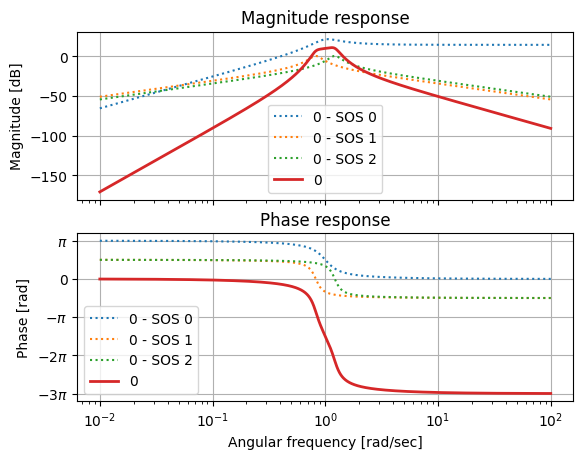

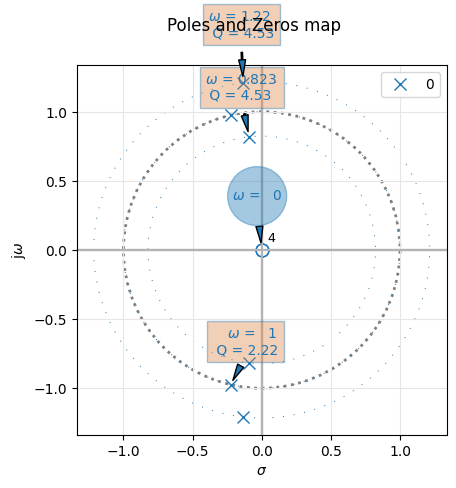

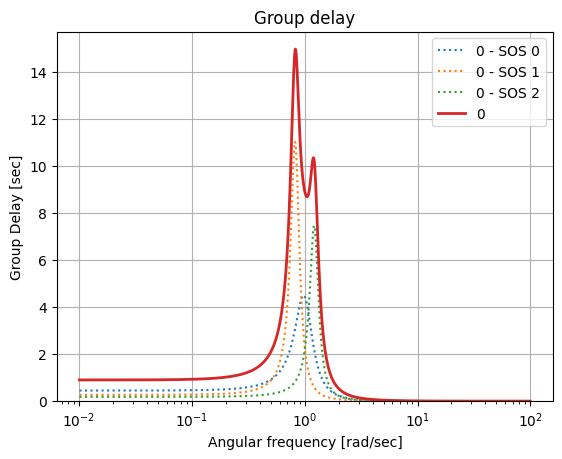

In [3]:
# importo librerias
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
#libreria de la catedra
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_SOS, tf2sos_analog
from pytc2.general import print_subtitle



#Plantilla del filtro pasa bajos prototipo

#wp=1
ws=2.16
alpha_max=3
alpha_min=20
KdB=10
Kveces=10**(KdB/20)



## Filtro pasa bajos Butterworth de tercer orden
ee = ( np.sqrt( 10**(alpha_max / 10) - 1 ))    #Por lo general w_p=1    
order=np.ceil( 0.5 * ( np.log10( ( 10**(alpha_min * 0.1) - 1 ) / ee**2)  / np.log10(ws) ) ) 
z,p,k = sig.buttap (order)
N, D = sig.zpk2tf(z, p, k)
N,D = sig.lp2bp(N*Kveces, D, 1, 0.45)

sos_bp = tf2sos_analog(N, D)
sos_bp[sos_bp < 1e-6] = 0.0
print_subtitle('Transferencia factorizada del Filtro pasa banda Butterworth de tercer orden')
pretty_print_SOS(sos_bp)
print_subtitle('Transferencia factorizada y parametrizada del Filtro pasa banda Butterworth de tercer orden')
pretty_print_SOS(sos_bp, mode='omegayq')
analyze_sys(sos_bp)